In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import seaborn as sns
import sklearn

Reading in Data and selected columns

In [6]:
air_data = pd.read_csv('pca_6comp_data_selection_norm.csv', delimiter=',')
cols_pca = ["PM2.5","PM10","NO2","O3","DEWP","WSPM"]

In [7]:
def pca(x):
    # Compute the autocovariance matrix and store it into autocovar
    autocovar = x.T @ x

    # Compute the eigenvalues und eigenvectors and store them into eigenval and eigenvec
    eigenval, eigenvec = np.linalg.eig(autocovar)
    return (eigenval, eigenvec)


Plot the spectrum of the eigenvalues. How many principal components to include based on the spectrum plot?

<BarContainer object of 6 artists>

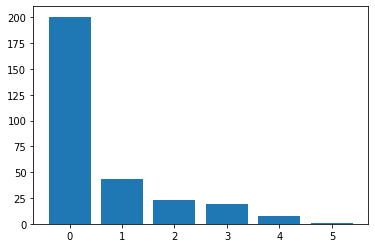

In [8]:
%matplotlib inline

(eigenval, eigenvec) = pca(air_data[cols_pca])

# Sort eigenvectors (and -values) by descending order of eigenvalues.
sort = np.argsort(-eigenval)
eigenval = eigenval[sort]
eigenvec = eigenvec[:,sort]

# To get an idea of the eigenvalues we plot them.
figure = plt.figure('Eigenvalue comparison')
plt.bar(np.arange(len(eigenval)), eigenval)

Now you should have a matrix full of eigenvectors. We can now do two things: project the data down onto the two dimensional subspace to visualize it and we can also plot the two first principle component vectors as eleven two dimensional points to get a feeling for how the features are projected into the subspace. Execute the cells below and describe what you see. Is PCA a good method for this problem? Was it justifiable that we only considered the first two principle components? What kinds of cars are in the four quadrants of the first plot? (**put your answer in the cell below of this code cell**)

In [20]:
### nascimento
## Covariance matrix of the normalized dataset
covmatrix = np.cov(pca_data_zscore.T)

## Obtain the eingenvalues and eingenvectors of covariance matrix
# The eigenvalues are not necessarily ordered
e, v = np.linalg.eig(covmatrix)

# order descendingly by largest eigenvalue
order = np.argsort((np.argsort(e) * -1))
e = e[order]
v = v[:,order]

print('Eigenvectors \n%s' %e)
print('\nEigenvalues \n%s' %v)

# generate PCA component space (PCA scores)
pc = np.dot(data_zscore[cols_pca], v)

Eigenvectors 
[0.01150778 0.13209943 0.95088753 3.99910075 0.51869851 0.387706  ]

Eigenvalues 
[[-0.72992429  0.20627644 -0.46858253 -0.43982239 -0.1013406   0.03711226]
 [ 0.68045563  0.27004015 -0.51721639 -0.42544317 -0.07780494  0.09741741]
 [ 0.03469454 -0.8539494   0.02533231 -0.47029212  0.01568464  0.21795481]
 [ 0.02626854 -0.36591585 -0.50193859  0.36581336 -0.40620289 -0.5609394 ]
 [ 0.03370325  0.036409    0.17455638 -0.39654128  0.46255143 -0.77192599]
 [-0.03407348 -0.14169949 -0.47944094  0.33662338  0.77748045  0.17636747]]


Text(0.5, 1, 'Data project on two PC')

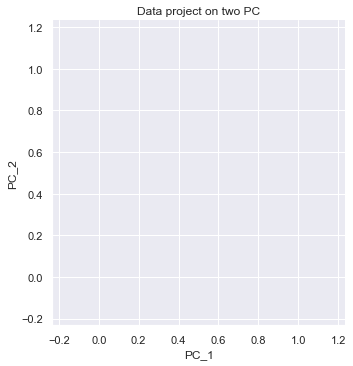

In [79]:
# set data to a Pandas Dataframa to ease plotting
names = ["PC_"+str(x+1) for x in range(pc.shape[1])]
data_pca = pd.DataFrame(data= pca_data_zscore, 
                     columns=names)

ax = sns.lmplot('PC_1', 
                'PC_2', 
                data=data_pca)
plt.title('Data project on two PC')


In [21]:
# set data to a Pandas Dataframa to ease plotting
names = ["U_"+str(x+1) for x in range(2)]
ds_us = pd.DataFrame(data= np.c_[u1, u2], 
                     columns=names)

# 1st plot
ax = sns.lmplot('U_1', 
                'U_2', 
                data=ds_us, 
                fit_reg=False,
                scatter_kws={'alpha':0.3});
ax.set(xlabel='Projection1-SVD', 
           ylabel='Projection2-SVD',
           title='SVD Projecting IrisData');

NameError: name 'u1' is not defined

TypeError: scatter() missing 1 required positional argument: 'y'

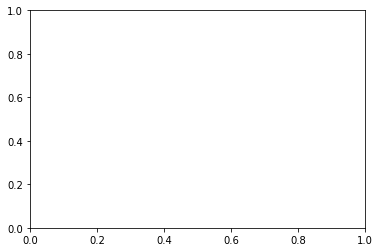

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

# Project the data down into the two dimensional subspace
proj = air_data @ eigenvec[:,0:2]
proj = np.array(proj)
#print(proj)

# Plot projected data
fig = plt.figure('Data projected onto first two Principal Components')
fig.gca()
fig.gca()
plt.scatter(proj)
plt.scatter(proj[:,0], proj[:,1])
# Divide plot into quadrants
plt.axhline(0, color='green')
plt.axvline(0, color='green')
# force drawing on 'run all'
fig.canvas.draw()

# Plot eigenvectors
eig_fig = plt.figure('Eigenvector plot')
plt.scatter(eigenvec[:,0], eigenvec[:,1])

# add labels
labels = cols
for label, x, y in zip(labels, eigenvec[:,0], eigenvec[:,1]):
    plt.annotate(
        label, xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'left', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'blue', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
# force drawing on 'run all'
eig_fig.canvas.draw()